<a href="https://colab.research.google.com/github/harishkollana/Airbnb-Capstone-Project/blob/main/Airbnb_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

**Load .csv files**






In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#creating a dataframe for the given data
df = pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **Data Exploration**

**Let’s see Data through Data Frame**

In [4]:
#just checking how the data is
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Dataset Information**

In [5]:
#knowing the volume of data
df.shape

(48895, 16)

In [6]:
#checking the information about column wise no of non null records & type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Unique values For Variable Identification**

In [7]:
#checking unique values for all columns(imp for knowing the categorical and numerical variables)
df.describe(include='all').loc['unique', :]


id                                  NaN
name                              47905
host_id                             NaN
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                            NaN
longitude                           NaN
room_type                             3
price                               NaN
minimum_nights                      NaN
number_of_reviews                   NaN
last_review                        1764
reviews_per_month                   NaN
calculated_host_listings_count      NaN
availability_365                    NaN
Name: unique, dtype: object

From the above we get to know that the name,host_name,neighbourhood_group,neighbourhood,room_tyoe and last review per month seems as categorical variables. But the thing is out of 48895 records name has 47905 unique almost same and last_review is date column. so we are not considering these as categorical variables for the proof we are checking with duplicate values below.

**Checking Duplicated Data**

In [8]:
#finding duplicate values of name variable
df.duplicated(subset=['name']).sum()

989

In [9]:
#duplicate records containing same name
df.loc[df.duplicated(subset=['name']), :].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158
661,250537,The Lenox in Harlem,1313306,Yvette,Manhattan,Harlem,40.81122,-73.94279,Entire home/apt,400,5,0,NaN,NaN,2,365
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84


In [10]:
#duplicate records containing same name of Loft w/ Terrace @ Box House Hotel
df.loc[df['name']=='Loft w/ Terrace @ Box House Hotel']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
328,80700,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73738,-73.95482,Private room,349,3,7,2019-05-24,0.07,28,60
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
680,253839,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73783,-73.95259,Private room,249,3,3,2015-11-03,0.03,28,60


From the above observation we came to know that all these are not duplicate but unique beacause they are having same name but different pricing in listings

In [11]:
#finding duplicate values of last_review variable
df.duplicated(subset=['last_review']).sum()

47130

In [12]:
#duplicate records containing same dates of last reviews
df.loc[df.duplicated(subset=['last_review']), :].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249


In [13]:
#duplicate records containing same dates of last reviews on 2019-06-22
df.loc[df['last_review']=='2019-06-22'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
37,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,Bushwick,40.70186,-73.92745,Entire home/apt,85,2,231,2019-06-22,1.96,2,22
55,14377,Williamsburg 1 bedroom Apartment,56512,Joanna,Brooklyn,Williamsburg,40.70881,-73.95930,Entire home/apt,150,30,105,2019-06-22,0.90,1,30


From the above observation we came to know that all these are not duplicate but unique beacause they are having same date but different listing in different locations

In [14]:
df.loc[df['host_name']=='Natasha']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2104,957642,Large bedroom/Heart of Brooklyn,1354796,Natasha,Brooklyn,Prospect-Lefferts Gardens,40.66167,-73.95098,Private room,49,5,114,2019-06-09,1.49,3,323
2765,1511303,Private fits 3 ppl. Prospect Park,1354796,Natasha,Brooklyn,Prospect-Lefferts Gardens,40.65936,-73.95139,Private room,49,5,84,2019-06-16,1.17,3,296
3037,1785942,"Private, Cozy Bedroom/ Barclay Ctr",1354796,Natasha,Brooklyn,Prospect-Lefferts Gardens,40.65987,-73.95076,Private room,44,5,79,2019-06-29,1.14,3,251
4550,3167768,Family-friendly 3-bedroom condo,16067583,Natasha,Brooklyn,Prospect Heights,40.67765,-73.96378,Entire home/apt,275,4,19,2019-07-05,0.32,1,34
4702,3304307,Lovely Shiny Private Room in NYC,12465884,Natasha,Manhattan,East Harlem,40.79269,-73.94218,Private room,100,3,64,2019-06-01,1.05,1,219
4853,3458525,Modern & Cozy 1BD Garden Apt,17430718,Natasha,Manhattan,Harlem,40.81511,-73.94315,Entire home/apt,115,3,64,2019-06-19,1.05,2,211
5341,3852261,SUNNY ROOM FOR TWO @ ELEGANT HOME NEAR JFK,19866189,Natasha,Queens,Arverne,40.58835,-73.79565,Private room,149,1,91,2019-07-01,1.53,5,358
6126,4483517,Stunning room. 15mins to Manhattan!,1633246,Natasha,Brooklyn,Bedford-Stuyvesant,40.68622,-73.92508,Private room,100,30,2,2015-04-28,0.04,4,7
6350,4632852,"Spacious, rustic barn style bedroom",23991556,Natasha,Bronx,Concourse,40.83719,-73.92015,Private room,85,1,9,2017-10-16,0.18,1,342
6882,4918117,Lovely room!- 15 min to Manhattan!!,1633246,Natasha,Brooklyn,Bedford-Stuyvesant,40.68679,-73.92327,Private room,65,2,9,2015-05-20,0.17,4,280


Host id and host names are linked and as from the above data one host has many host ids with respect to change in neighbourhood groups and neighbourhood and listing names

**Checking Null Values**

In [15]:
#checking null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Missing Values Treatment**

In [16]:
df['name'].fillna('unknown',inplace=True) #filling nan with unknown as we dont know the name
df['host_name'].fillna('no_name',inplace=True) #filling nan with no_name as we dont know the hostname
df['reviews_per_month']=df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')#filling nan with 0 and as type integer beacause it is quantitative
df.drop(['id','last_review'],axis=1,inplace=True) #last review it is unnecessary we can drop the column


the column: 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

**Checking For any null values remaining**

In [17]:
#checking for null and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  int64  
 12  calculated_host_listings_count  

**Data Description Of Numeric Variables**

In [18]:
#getting to know the description of data.( most of time we can get to know about ouliners here by min,max and quartiles). price seems to have outlines as min 0 i.e free and max 10,000 but median is 106
df.describe().round(2)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,6.762001e+07,40.73,-73.95,152.72,7.03,23.27,0.81,7.14,112.78
std,7.861097e+07,0.05,0.05,240.15,20.51,44.55,1.50,32.95,131.62
min,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.00,1.00,0.00
25%,7.822033e+06,40.69,-73.98,69.00,1.00,1.00,0.00,1.00,0.00
50%,3.079382e+07,40.72,-73.96,106.00,3.00,5.00,0.00,1.00,45.00
75%,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,1.00,2.00,227.00
max,2.743213e+08,40.91,-73.71,10000.00,1250.00,629.00,58.00,327.00,365.00


From the above information we can observe that the host id is unique id and we can skip that on this features like min,max and main important point is price is having outliners by measuring range and observing inter quartile ranges

In [19]:
len(df[df['price']==0]) #so 11 property/listings have 0 price listed.


11

**Checking for duplicated data**

In [20]:
duplicate_data = df.duplicated()
print(duplicate_data.sum())
df[duplicate_data]
#looks like there's no duplicate data present!

0


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


**Most no of listings in NYC**

In [21]:
listings_count=df.name.value_counts()
listings_count

Hillside Hotel                                        18
Home away from home                                   17
unknown                                               16
New york Multi-unit building                          16
Brooklyn Apartment                                    12
                                                      ..
Comfy room in South Williamsburg- Big Screen TV        1
tiny, tiny room in Bushwick                            1
Zen Studio Loft in Beautiful West Chelsea              1
Modern 1 Bedroom In Vibrant BK Neighborhood            1
1BR  Breathtaking view w/Private Roof Top Bushwick     1
Name: name, Length: 47906, dtype: int64

In [22]:
#top 5 listings on Airbnb in entire NYC:
top_5_listings=listings_count[:5].reset_index()
top_5_listings.rename(columns= {'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
top_5_listings

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,unknown,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.

**Most no of listings by Host**

In [23]:
top_10_hosts=df['host_name'].value_counts()[:10]#top 10 hosts on the basis of no of listings in entire NYC!
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

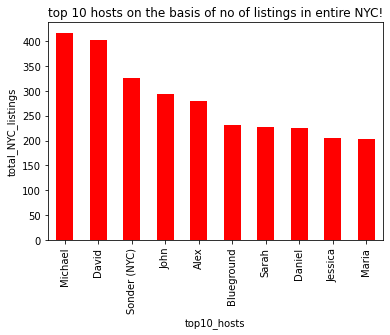

In [24]:
top_10_hosts.plot(kind='bar',color='r')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')

**Most no of listings by Neighbourhood Group**

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group!')

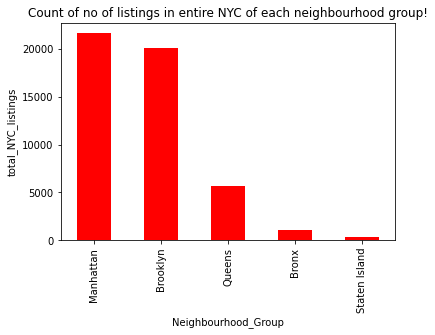

In [25]:
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC! 
df.neighbourhood_group.value_counts().plot(kind='bar',color='r')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group!')

**Most no of listings by Neighbourhood**

In [26]:
df.neighbourhood.nunique()

221

In [27]:
df.neighbourhood.unique()#looking at the unique neighbourhoods 

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood!')

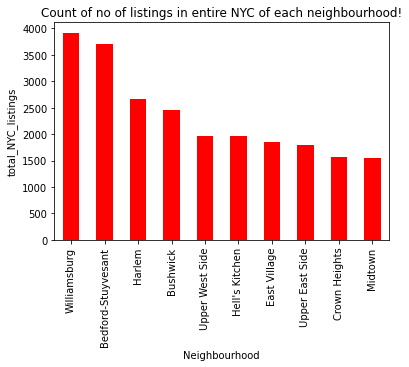

In [28]:
#the neighbourhood 'Williamsburg' has the highest no of listings in entire NYC! 
df.neighbourhood.value_counts()[:10].plot(kind='bar',color='r')
plt.xlabel('Neighbourhood')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood!')

**No of listings in Neighbourhood Group by Room types**

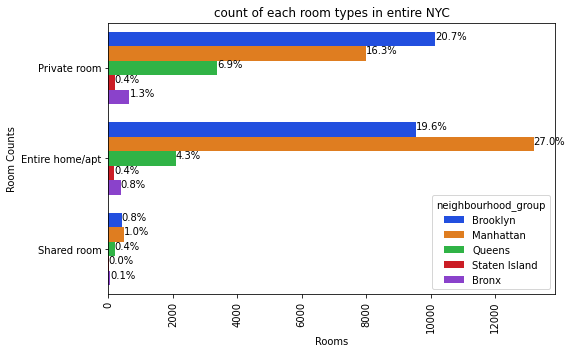

In [29]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df,palette='bright')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()


Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

# **Data Analysis**

**Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


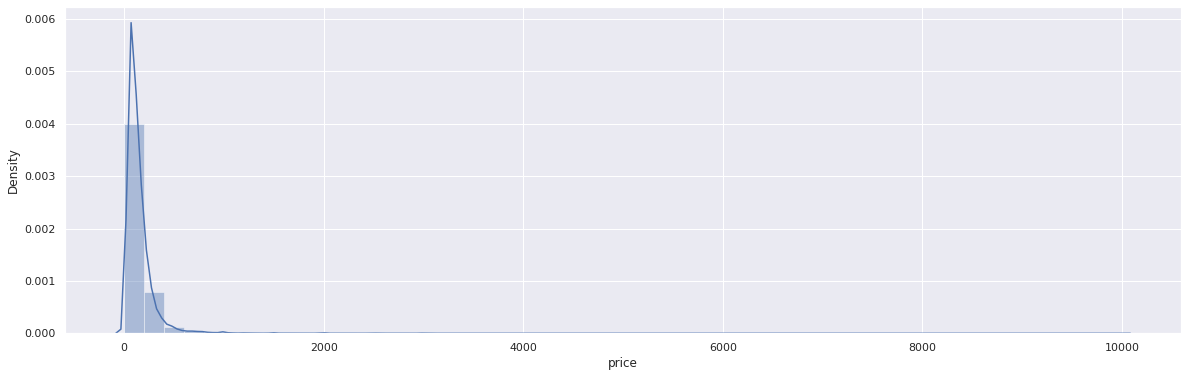

In [30]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df["price"])

The distribution tells it has positive skew
also the distribution doesn't deviate much from normal distribution.

In [31]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


It looks the skew and kurtosis came out very large. Since the skewness has value>1 it is highly skewed.

Also kurtosis looks high as well which indicates presence of good amount of outliers,we will look later into that when we handle outliers!!

If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution

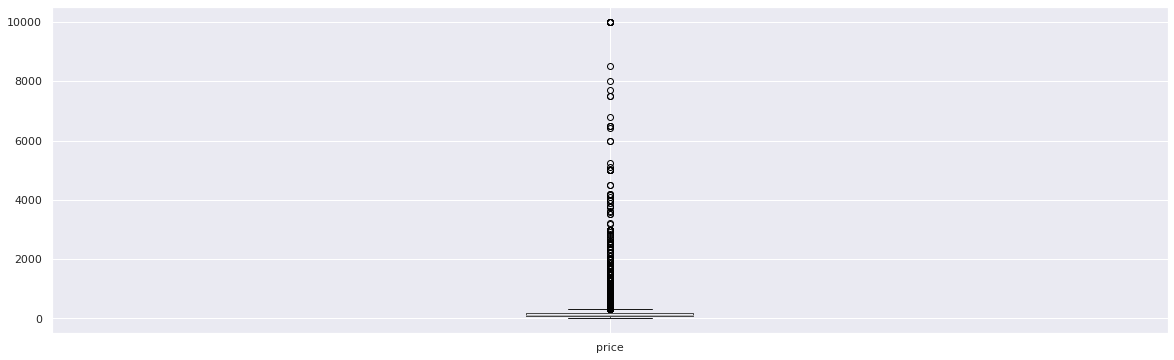

In [32]:
df.boxplot('price')
#we can see the presence of many outliers in price. Definitely we'll remove those.

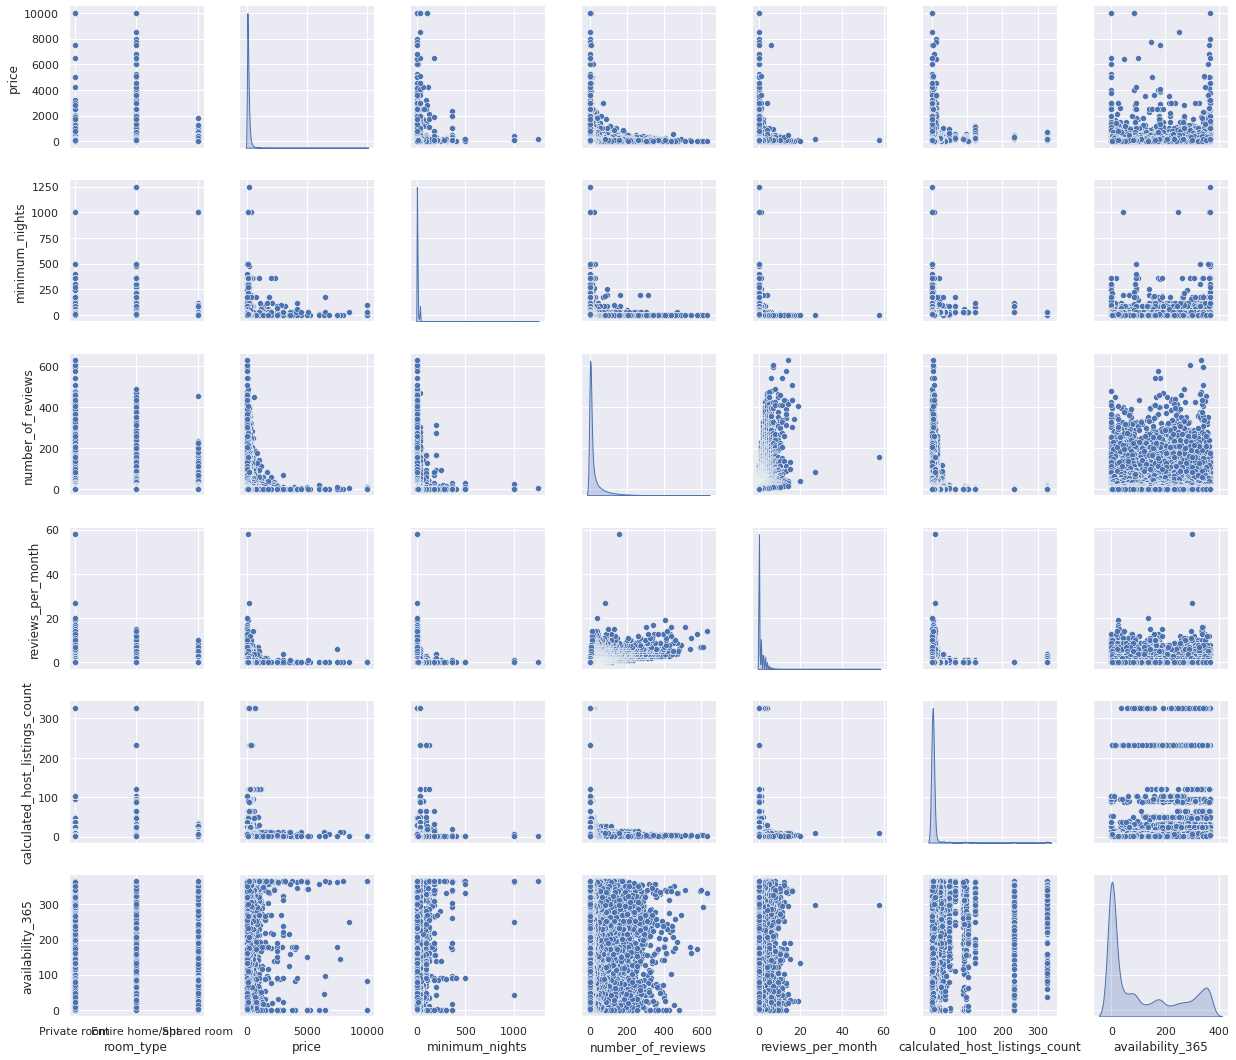

In [33]:
sns.pairplot(
    df,
    x_vars=["room_type","price", "minimum_nights", "number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"],
    y_vars=["price", "minimum_nights", "number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"],diag_kind='kde'
)

In [34]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


In [35]:
df.skew()

host_id                            1.206214
latitude                           0.237167
longitude                          1.284210
price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.751642
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: float64

In [36]:
df.kurtosis()

host_id                             0.169106
latitude                            0.148845
longitude                           5.021646
price                             585.672879
minimum_nights                    854.071662
number_of_reviews                  19.529788
reviews_per_month                  54.337612
calculated_host_listings_count     67.550888
availability_365                   -0.997534
dtype: float64

 If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

 If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails). If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails).

Observation:

availability_365 have uniform distribution with availability ranging from 0 to 370

The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers)

.......

Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.

Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.

**Correlation Matrix**

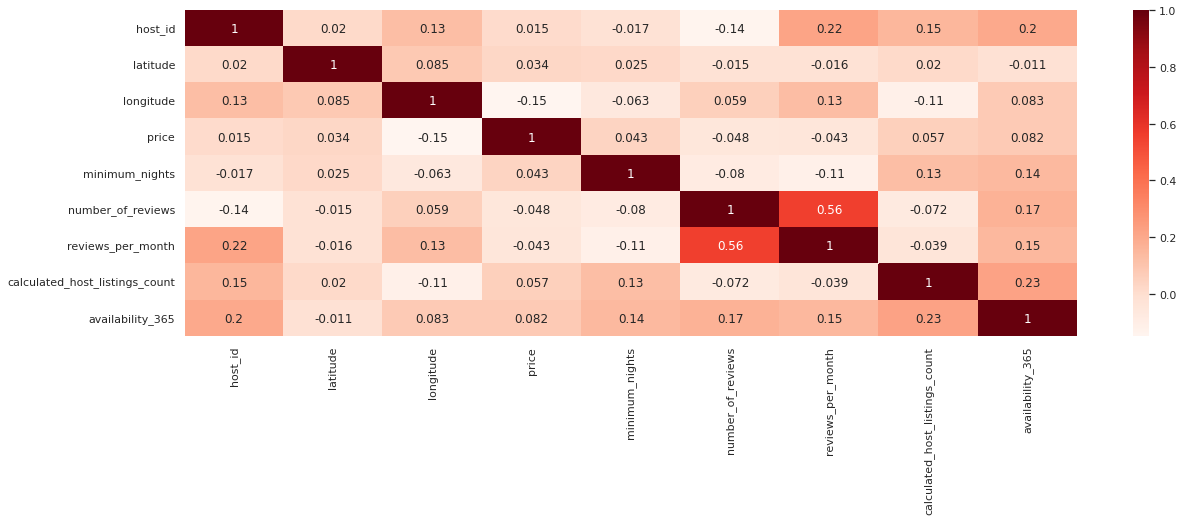

In [37]:
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
plt.show()

Observation:

There's correlation among host_id to reveiws_per_month & availability_365.

Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

**Outliner Detection**

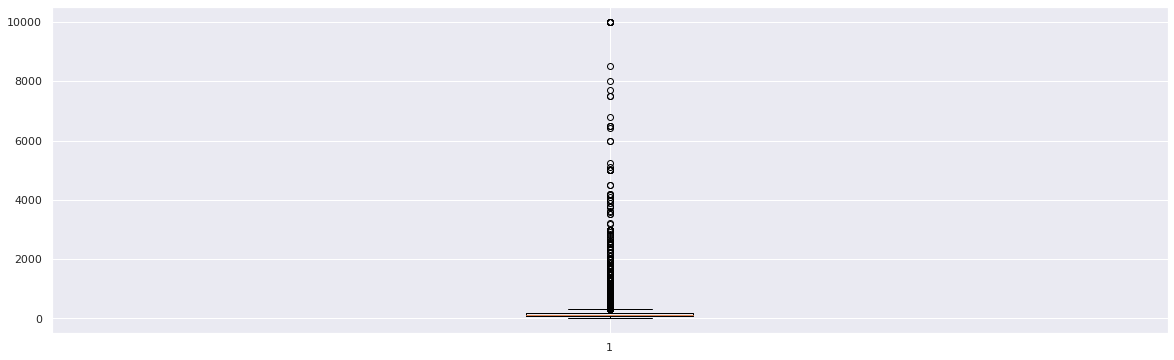

In [38]:
plt.boxplot(df["price"])
plt.show()

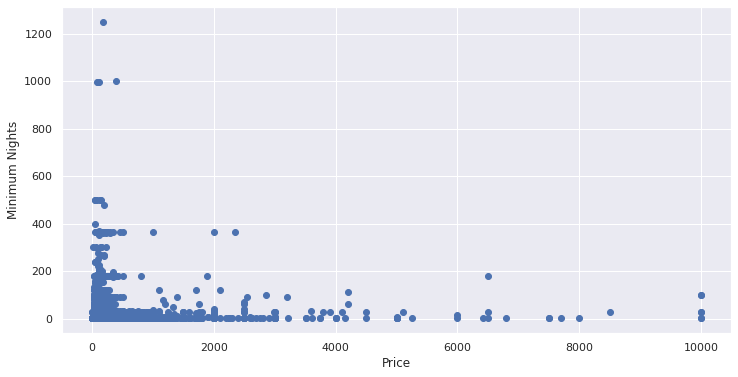

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['price'], df['minimum_nights'])
ax.set_xlabel('Price')
ax.set_ylabel('Minimum Nights')
plt.show()

The above chart indicates that most of the data points are clustered in the lower half of the plot. The points located to the extreme right of the x-axis or the y-axis indicate outliers.

In [40]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


In [41]:
print(df['price'].quantile(0.01))
print(df['price'].quantile(0.05))
print(df['price'].quantile(0.10))
print(df['price'].quantile(0.25))
print(df['price'].quantile(0.50))
print(df['price'].quantile(0.75))
print(df['price'].quantile(0.90))
print(df['price'].quantile(0.95))
print(df['price'].quantile(0.98))
print(df['price'].quantile(0.99))
print(df['price'].quantile(1.00))

30.0
40.0
49.0
69.0
106.0
175.0
269.0
355.0
550.0
799.0
10000.0


**Outlier Treatment**

**Using quantile approach to remove outliers.**

In [42]:
min_threshold,max_threshold= df.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [43]:
df[df.price<min_threshold].head() #prices less than min threshold!

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0,1,226
2675,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0,1,321
2860,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0,4,137
3020,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5,3,50
3918,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1,3,258


In [44]:
len(df[df.price<min_threshold]) #prices less than min threshold!

404

In [45]:
df[df.price>max_threshold]  #similary for getting extreme price value above max_threshold

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1862,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,0,1,83
2698,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,0,1,365
3537,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,0,1,359
3695,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,0,1,0
3720,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,0,1,0
3774,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,0,1,0
3788,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,0,1,0
4345,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,0,1,363
4376,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,0,11,365
4377,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0,11,365


In [46]:
len(df[df.price>max_threshold])#extreme price value above max_threshold

45

In [47]:
quantile_df = df[(df.price>min_threshold)&(df.price<max_threshold)]
quantile_df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


In [48]:
quantile_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.818300e+04,48183.000000,48183.000000,48183.000000,48183.000000,48183.000000,48183.000000,48183.000000,48183.000000
mean,6.723035e+07,40.729155,-73.952498,148.772036,7.011104,23.393915,0.807380,7.190046,112.740220
std,7.851540e+07,0.054231,0.045894,153.594795,20.526646,44.701116,1.503468,33.175856,131.523239
min,2.438000e+03,40.499790,-74.244420,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.719674e+06,40.690355,-73.983190,70.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,3.038419e+07,40.723280,-73.955930,110.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,1.072455e+08,40.763180,-73.936960,179.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,2999.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


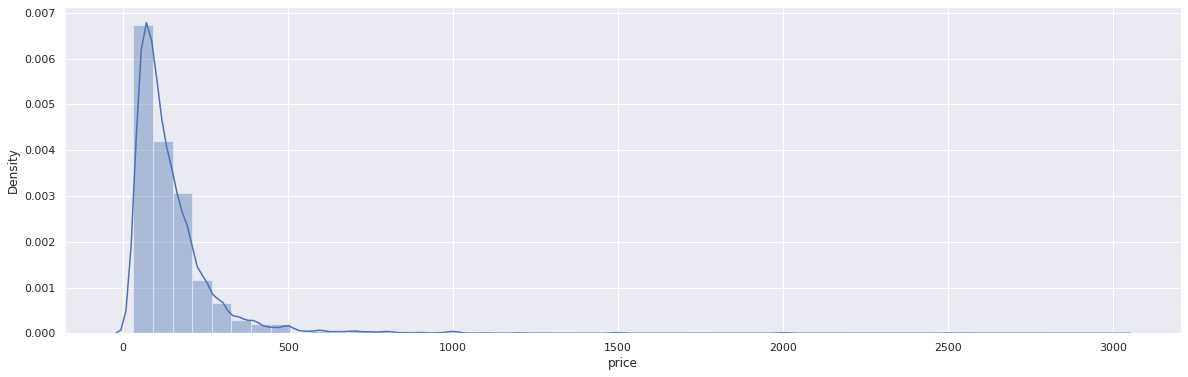

In [49]:
sns.distplot(quantile_df['price'])

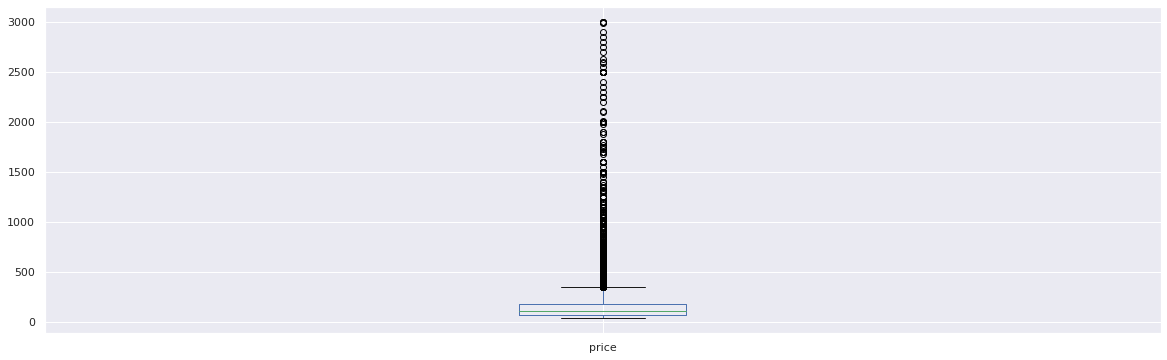

In [50]:
quantile_df.price.plot(kind='box')  #looks there are still many outliers!

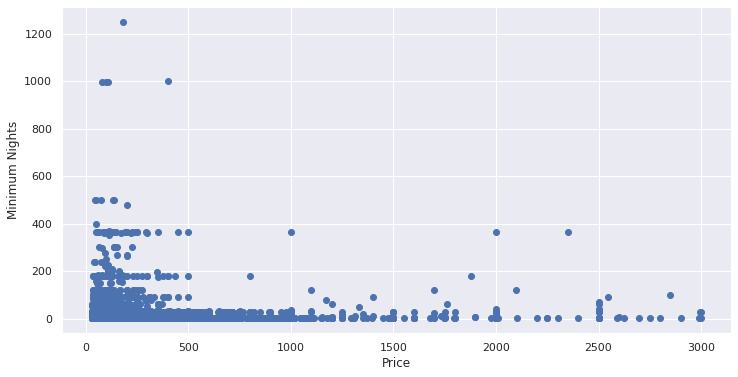

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(quantile_df['price'], quantile_df['minimum_nights'])
ax.set_xlabel('Price')
ax.set_ylabel('Minimum Nights')
plt.show()

In [52]:
#skewness and kurtosis
print("Skewness: %f" % quantile_df['price'].skew())
print("Kurtosis: %f" % quantile_df['price'].kurt())

Skewness: 6.378314
Kurtosis: 70.394436


**Using Inter Quartile Range approach to remove outliers.** (has performed best in removing outliers)

In [53]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.000000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


In [54]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [55]:
lower_bound,upper_bound = outlier_treatment(df['price'])
lower_bound,upper_bound

(-90.0, 334.0)

In [56]:
df[(df.price > lower_bound) | (df.price < upper_bound)] #looking at the low and upper range outliers

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


In [57]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively
iqr_df = df[(df.price > lower_bound) & (df.price < upper_bound)]

In [58]:
iqr_df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


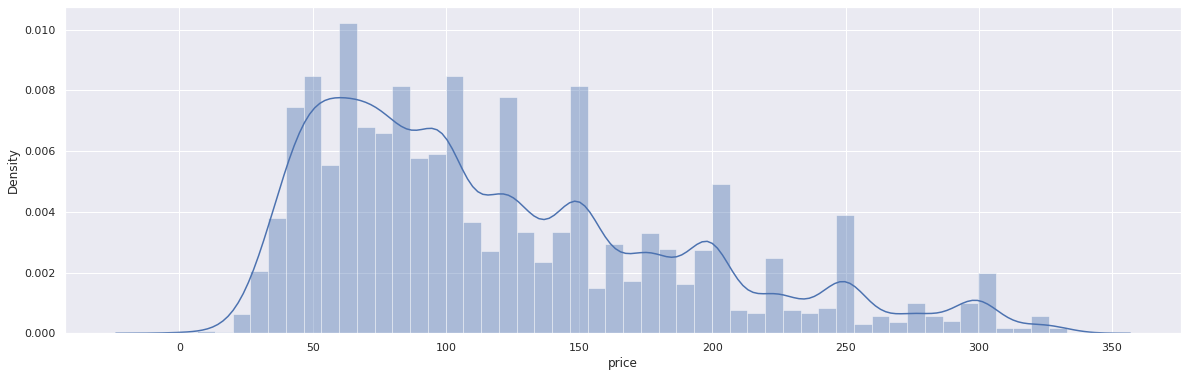

In [59]:
sns.distplot(iqr_df['price'])

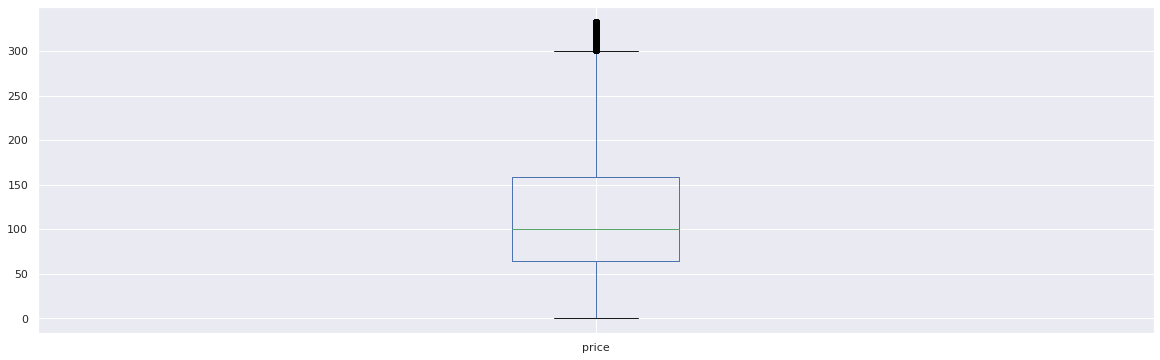

In [60]:
iqr_df.price.plot(kind='box')

In [61]:
#skewness and kurtosis
print("Skewness: %f" % iqr_df['price'].skew())
print("Kurtosis: %f" % iqr_df['price'].kurt())

Skewness: 0.922925
Kurtosis: 0.169543


**Bi-variate Analysis!**

**Now let's understand the distribution of price(without extreme values) along neighbourhood groups**



In [62]:
iqr_df['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

**Distribution of price across Manhattan,Brooklyn,Queens,Bronx & Staten Island :-**

Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group.

We can do a seaborn point plot to get the average prices/neighbourhood in NYC!

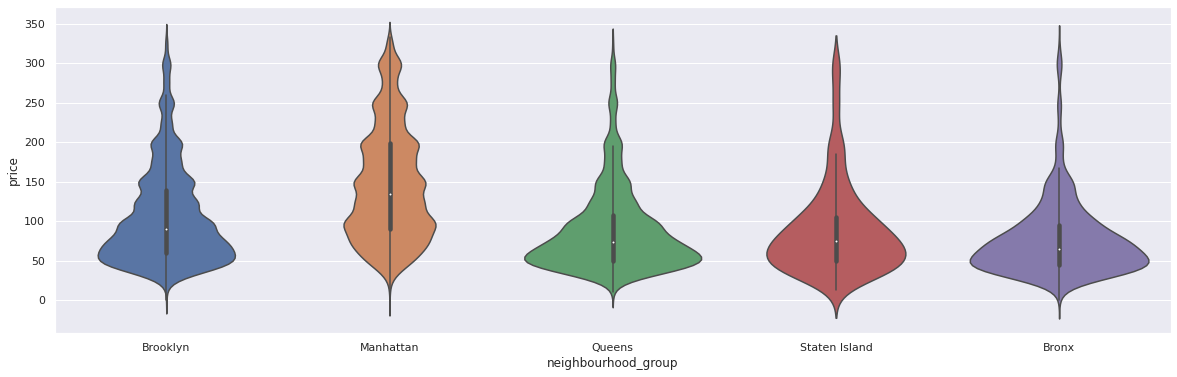

In [63]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data=iqr_df)

Manhattan being the most costliest place to live in, have price more than 140 USD followed by Brooklyn with around 80 USD on an average for the listings.

Queens, Staten Island are on the same page with price on listings.

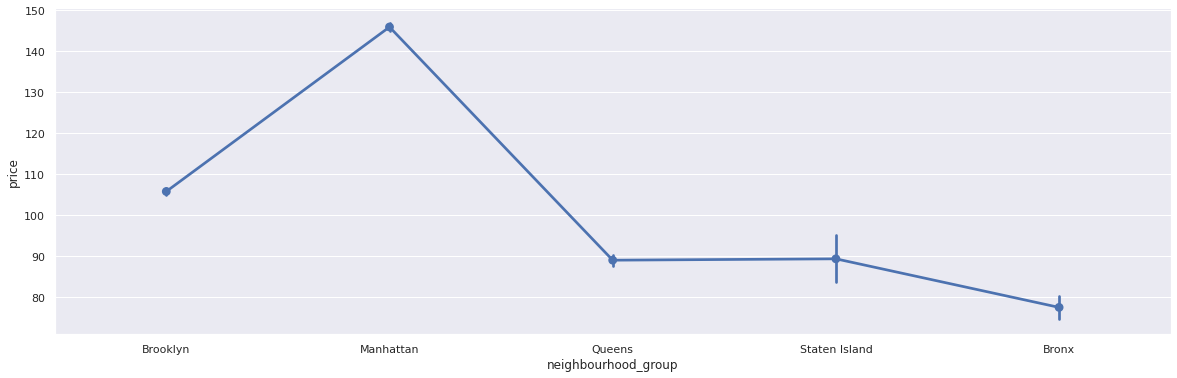

In [64]:
#looking for the average price each neighbourhood groups holds in a seaborn pointplot
sns.pointplot(x = 'neighbourhood_group', y='price', data=iqr_df, estimator=mean)

We can see that Manhattan has the highest(the costliest) average of price ranging to ~150dollars/day followed by Brooklyn

Queens and Staten Island have same average price/day, while Bronx comes out to be the cheapest neighbourhood group in NYC.

Well, let's deep dive into cost of living as it is the most important factor for someone willing to rent/stay using Airbnb.

**Multivariate Analysis**

**The costliest listings with respect to prices**

In [116]:
quantile_df.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Upper West Side,Lisa,Entire home/apt
48304,Next to Times Square/Javits/MSG! Amazing 1BR!,Manhattan,Hell's Kitchen,Rogelio,Entire home/apt
46533,Amazing Chelsea 4BR Loft!,Manhattan,Chelsea,Viberlyn,Entire home/apt
30824,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,Manhattan,Nolita,Ilo And Richard,Entire home/apt
22992,"Modern Townhouse for Photo, Film & Daytime Ev...",Manhattan,Upper West Side,Lanie,Entire home/apt


Looks like the all the top 5 costliest listings belongs to Manhattan itself(being the most costliest place of living in NYC)



**The cheapest listings with respect to prices**

In [66]:
quantile_df.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type
12516,cute and cozy room in brooklyn,Brooklyn,Bedford-Stuyvesant,Ornella,Private room
7864,Comfortable and Large Room,Brooklyn,Flatbush,Kay,Private room
29967,Large bed room share bathroom,Queens,Elmhurst,Cha,Private room
39100,15 minutes From Times Square!!,Manhattan,Washington Heights,Ari,Private room
28700,Cozy room in Loft Apartment - Brooklyn,Queens,Ridgewood,Estefani,Private room


Also, the cheapest listings mostly comes from Brooklyn, Queens and all are private rooms which makes sense.

**Top neighbourhoods in NYC with respect to average price/day of Airbnb listings:**

let's check for the neighbourhoods with listings having highest average price/day in each neighbourhood groups of NYC!

In [67]:
df_ngrp= quantile_df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [68]:
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
121,Manhattan,Tribeca,410.531429
163,Queens,Neponsit,274.666667


Fort Wadsworth from Staten Island highest average price/day in each neighbourhood groups of NYC!

Text(0, 0.5, 'price')

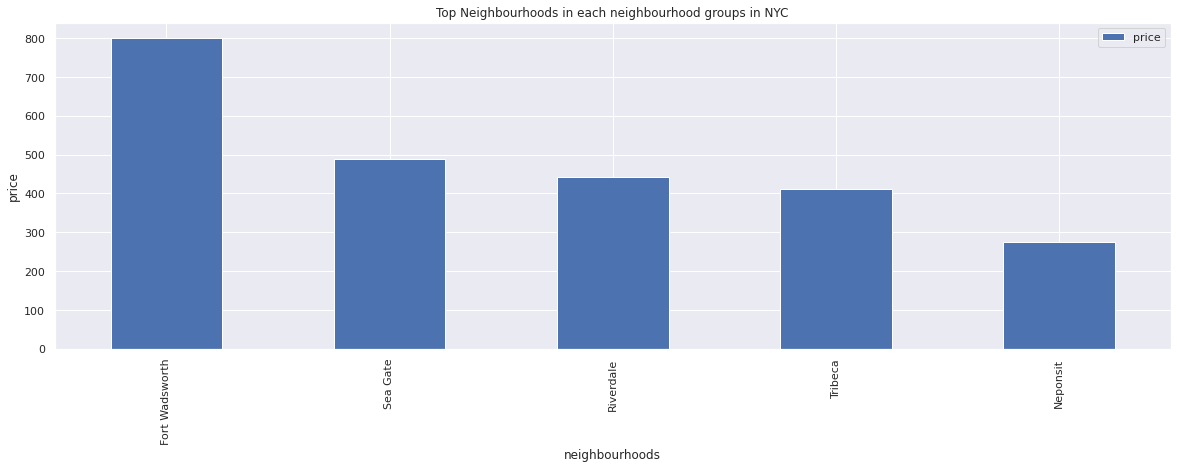

In [69]:
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

**The costliest listings in each neighbourhood groups & their respective hosts:**

In [70]:
costliest_df= quantile_df.loc[quantile_df.groupby('neighbourhood_group')['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

In [71]:
costliest_df.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Lisa,2999
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Sally,2626
42680,Majestic Mansion LifeStyle :),Queens,Shah,2600
24477,"""The luxury of Comfort""",Bronx,Kathy,2500
45572,Central Hall Colonial with Free Parking Bus EX...,Staten Island,Anastasios,1250


LUXURIOUS 5 bedroom, 4.5 bath home & Park Place Townhouse were from Manhattan and Brooklyn, hosted by Lisa and Sally respectively.

**The costliest listings in each neighbourhood groups & their respective hosts:**

In [135]:
cheapest_df= quantile_df.loc[quantile_df.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]

In [73]:
cheapest_df.sort_values(by='price',ascending=True)

,neighbourhood_group,name,host_name,price
2887,Brooklyn,Amazing Spacious Room,Lord Daniel,31
7431,Manhattan,Cozy room right on BROADWAY - Washington Heights,Nga,31
6615,Queens,"Super Clean, Quiet & Spacious Room",Troy,31
30312,Staten Island,Nice room near SI Ferry \n15 minutes by car.,Sara I,31
3889,Bronx,"A Simple, Calm Space",Août,32


Looks almost all the neighbourhood groups with the lowest price falls in the same price range for the cheapest listings.

**Room_types vs price on different neighbourhood groups!**

In [74]:
quantile_df['room_type'].unique() #unique rooms available throughout NYC


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

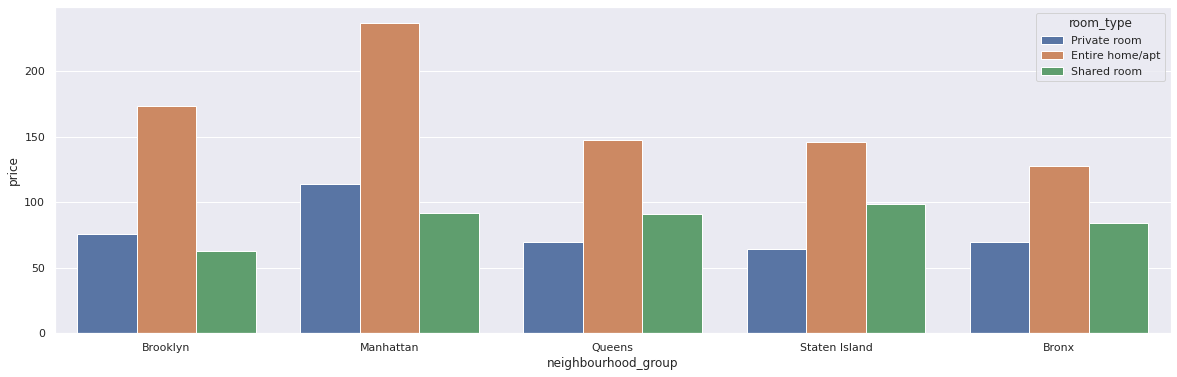

In [88]:
ax = sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=quantile_df,ci=None)

Looks like a property/listing with **Entire home/apt** as room_type wins the show at NYC followed by private rooms.

**Manhattan** has the highest price for room types with **Entire home/apt** ranging to nearly 240 USD/night, followed by **Private room** with 110 USD/night. And it's obvious being the most expensive place to live in!

**Average for how many nights people stayed in each room_types!**

Text(0, 0.5, 'Min Stays')

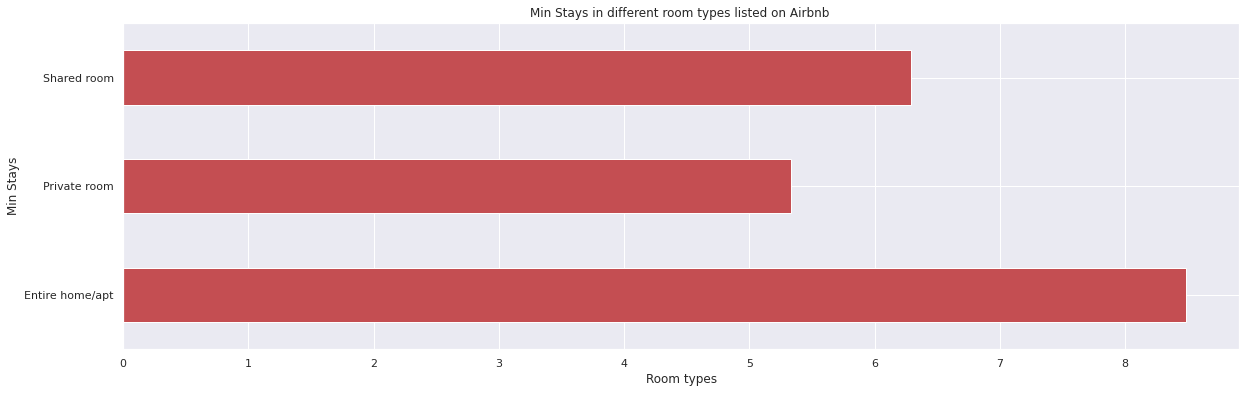

In [76]:
quantile_df.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='r')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')

Looking at these it clearly indicates that people mostly prefer living in an **entire home/apt** on an average of **more than 8 nights** followed by guests who stayed in **shared room** where average stay is **6-7 nights.**

**Let's play around with the reviews on listings in NYC!**

**top 10 most reviewed listings in NYC!**

In [105]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= quantile_df.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58,Manhattan
42076,Great Room in the heart of Times Square!,27,Manhattan
38870,Lou's Palace-So much for so little,20,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16,Queens
36238,“For Heaven Cakes”,15,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15,Queens


So, this are the listings with highest number of reviews, the highest being: **Enjoy great views of the City in our Deluxe Room!** with **58 reviews/month** followed by **Great Room in the heart of Times Square!** with a total of **27 reviews/month.** Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the **prices are high to afford.**

**Average Price In Top 10 Reviewed Listings Per Night**

In [133]:
price_avrg=top10_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 76.2


**Most Reviewed room_types in each Neighbourhood Groups**

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

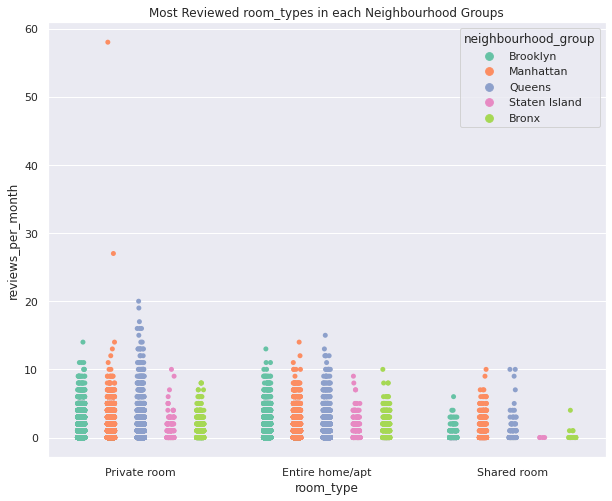

In [106]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=quantile_df,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

We can see that **Private room recieved the most no of reviews/month** where **Manhattan had the highest** reviews received for Private rooms with more than **50 reviews/month**, followed by **Manhattan in the chase.**

**Manhattan & Queens got the most no of reviews for Entire home/apt room type.**

There were less reviews recieved from **shared rooms** as compared to other room types and it was **from Staten Island followed by Bronx**.

**Let's find the top 10 reviewed hosts on the basis of reviews/month.**

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

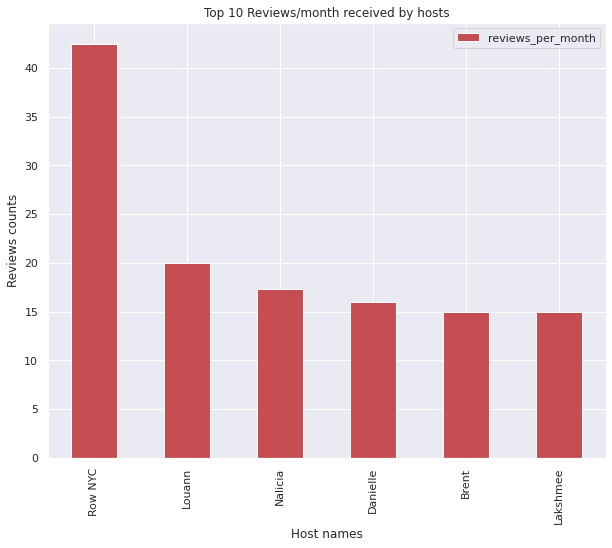

In [107]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='r')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

Row NYC holds the title as the most reviewed host with more than 40 reviews/month on average.



**Hosts with most no of listings in NYC(on the basis of host listings count):**

In [108]:
host_with_most_listings= quantile_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13084,Sonder (NYC),Manhattan,106929
1816,Blueground,Manhattan,53360
7211,Kara,Manhattan,14669
6483,Jeremy & Laura,Manhattan,9216
13083,Sonder,Manhattan,9216
2877,Corporate Housing,Manhattan,8281
7413,Kazuya,Queens,7725
7478,Ken,Manhattan,7500
11295,Pranjal,Manhattan,4225
9762,Mike,Manhattan,2823


So, **Sonder(NYC)** leads the most expensive neighbourhood group in NYC with around** 106929 properties** listed followed by Blueground and Kara.

Also, all 3 of them has their listings on **Manhattan.**

**We can also check for hosts with most listings in each neighbourhood group.**

The hosts leading each neighbourhood group with most no of Airbnb listings in entire NYC.

In [99]:
hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
7480,Kazuya,Queens,8137
14432,Vida,Brooklyn,2705
14435,Vie,Bronx,169
685,Amarjit S,Staten Island,64


So, Sonder (NYC), Kazuya, Vida, Vie and Amarjit are the hosts with most no of listings in each neighbourhood groups in entire NYC!

**Room_types and their relation with availability in different neighbourhood groups!**

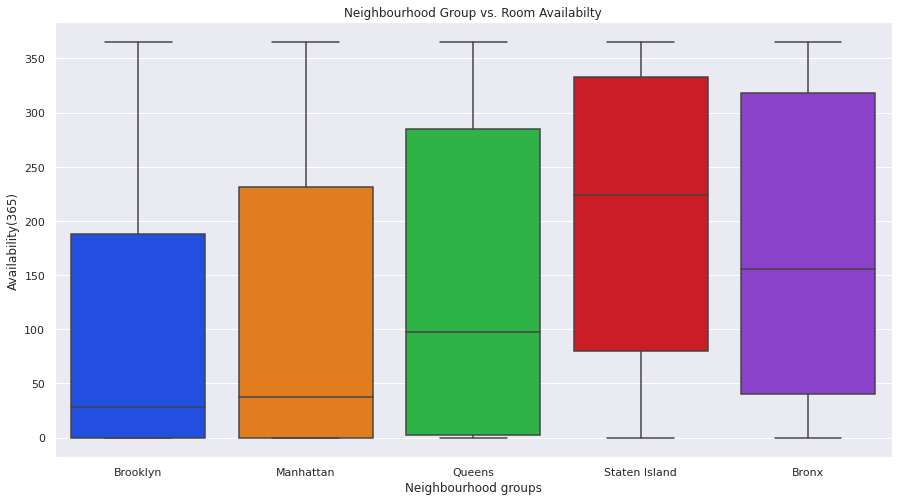

In [109]:
f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=quantile_df,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

Looking at the above categorical box plot we can infer that the listings in Staten Island seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by Bronx where every listings are available for 150 on an average every year.

**Let's see what can be done with latitude and longitude!**

Text(0.5, 1.0, 'Location Co-ordinates')

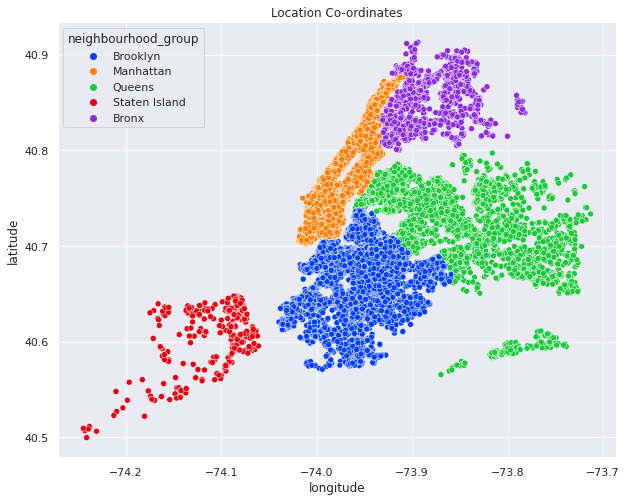

In [110]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=quantile_df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates') 

**Let's observe the type of rooms as well**

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

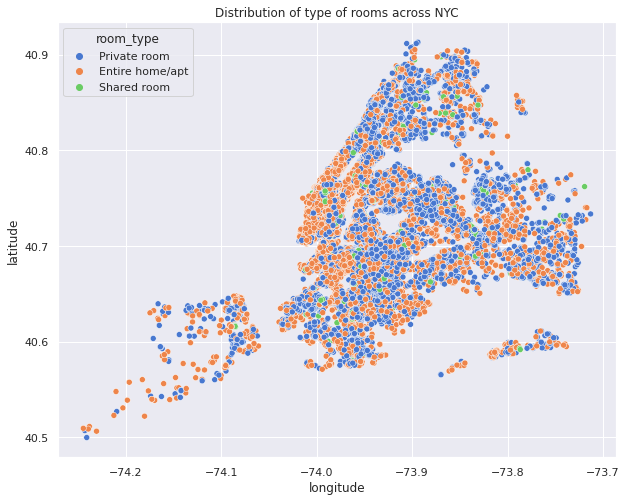

In [111]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x="longitude", y="latitude",hue="room_type",data=quantile_df,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt.

95% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb.

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

**Let's have an idea of the price variations across these co-ordinates in a more clear way**

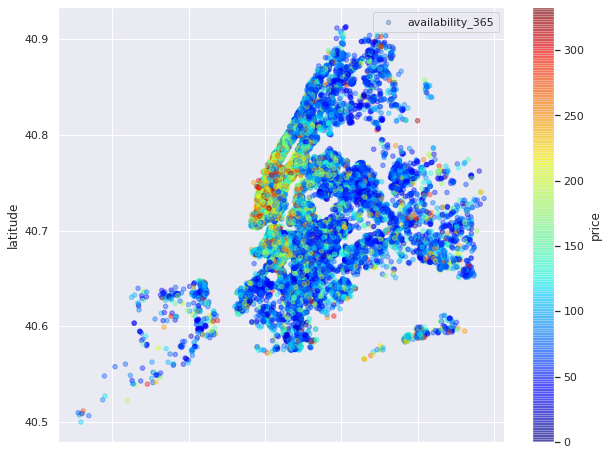

In [123]:
lat_long=iqr_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
lat_long.legend()

We can infer that there are high range of prices across Manhattan being the most costliest place to stay in NYC



It is important to note that we had to drop some extremely high values as they are treated as outliers for our analysis.


In [124]:

#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in df.name:
    _names_.append(name)

#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl

#initializing empty list where we are going to have words counted
_names_for_count_=[]

#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [125]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [126]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

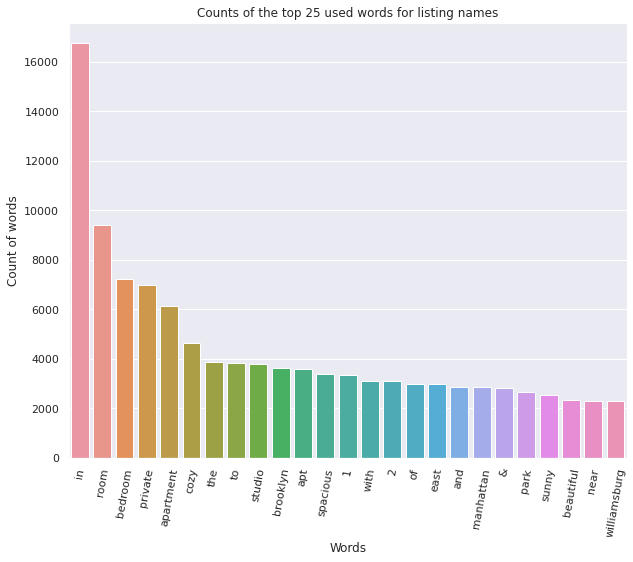

In [132]:
#we are going to use barplot for this visualization
viz_words=sns.barplot(x='Words', y='Count', data=sub_w)
viz_words.set_title('Counts of the top 25 used words for listing names')
viz_words.set_ylabel('Count of words')
viz_words.set_xlabel('Words')
viz_words.set_xticklabels(viz_words.get_xticklabels(), rotation=80)

We can observe that finding out and going over top 25 used listings' name words - we are able to see one clear trend. It shows that hosts are simply describing their listing in a short form with very specific terms for easier search by a potential traveler. Such wors are 'room', 'bedroom', 'private', 'apartment', 'studio'. This shows that there are no catchphrases or 'popular/trending' terms that are used for names; hosts use very simple terms describing the space and the area where the listing is. This technique was somewhat expected as dealing with multilingual customers can be tricky and you definitely want to describe your space in a concise and understood form as much as possible.